In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

mu = np.array([[-1.5, 2.3],[-2.8, 2.8],[-2.8, 1.3]])
std = np.array([0.3, 0.2, 0.4])

In [3]:
x, y = make_blobs(
  n_samples=2000,
  centers=mu,
  cluster_std=std,
  random_state=42
)

In [5]:
x, x.shape

(array([[-2.72646619,  2.37721347],
        [-0.93539265,  2.70362601],
        [-3.08367315,  2.44783824],
        ...,
        [-1.30842226,  1.80154398],
        [-3.32685277,  1.61041117],
        [-2.806646  ,  2.75837663]]),
 (2000, 2))

In [6]:
y, y.shape

(array([2, 0, 1, ..., 0, 2, 1]), (2000,))

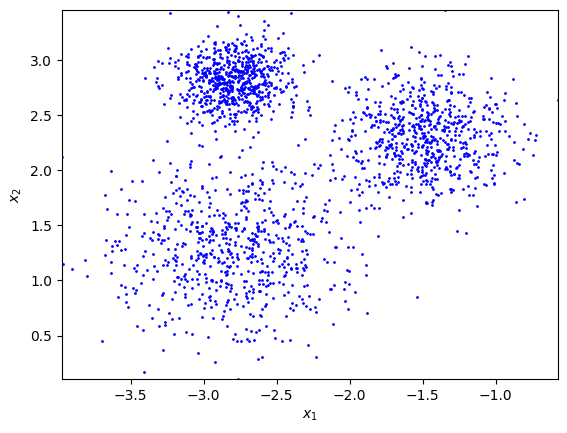

In [ ]:
plt.figure(figure=(4, 4))
plt.scatter(x[:, 0], x[:, 1], c='b', s=1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis([
  x.min(axis=0)[0],
  x.max(axis=0)[0],
  x.min(axis=0)[1],
  x.max(axis=0)[1]
])

plt.show()

# KMeans()

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [14]:
centroids = kmeans.cluster_centers_
centroids

array([[-2.79985278,  2.79178783],
       [-1.49439497,  2.29832468],
       [-2.81716399,  1.24566013]])

In [15]:
kmeans.inertia_

369.70683807071003

In [19]:
kmeans.n_iter_ 

4

## Predict(hard)

In [20]:
x_new = np.array([
  [-3, 1.5],
  [-1, 2],
  [-3, 3],
  [-2, 2]
])

kmeans.predict(x_new)

array([2, 1, 0, 1], dtype=int32)

## Predict(soft)

In [21]:
kmeans.transform(x_new)

array([[1.3072011 , 1.7041622 , 0.31323757],
       [1.96631584, 0.57742879, 1.96751457],
       [0.28881   , 1.66108241, 1.76384165],
       [1.12547432, 0.58705542, 1.11210863]])

## Plot model

In [22]:
def plot_decision_boundaries(model, x, cen):
  mins = x.min(axis=0)
  maxs = x.max(axis=0)

  x1s = np.linspace(mins[0], maxs[0], 1000)
  x2s = np.linspace(mins[1], maxs[1], 1000)
  x1, x2 = np.meshgrid(x1s, x2s)

  x_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = model.predict(x_new).reshape(x1.shape)

  plt.scatter(x[:, 0], x[:, 1], c='b', s=1)
  plt.contourf(x1, x2, y_pred, alpha=0.2)
  plt.contour(x1, x2, y_pred, colors='k', linewidths=1)
  plt.scatter(cen[:, 0], cen[:, 1], c='r', marker='x', s=5, linewidths=10, alpha=1)

  plt.axis([mins[0], maxs[0], mins[1], maxs[1]])
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')

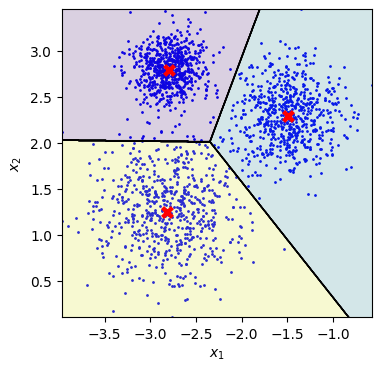

In [23]:
plt.figure(figsize=(4, 4))
plot_decision_boundaries(kmeans, x, centroids)
plt.show()

## MiniBatchKMeans()
資料量很大可用

In [24]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)

minibatch_kmeans.fit(x)

MiniBatchKMeans(n_clusters=3, random_state=42)

In [25]:
minibatch_kmeans.inertia_

369.716571640918

### Select K (inertia)

In [26]:
kmeans_k = [KMeans(n_clusters=k, random_state=42).fit(x) for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_k]

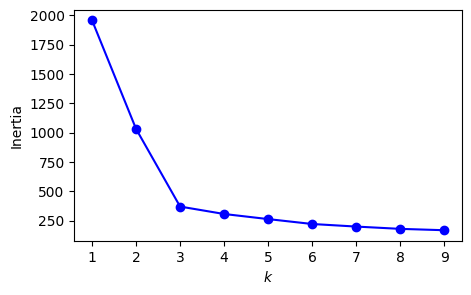

In [27]:
plt.figure(figsize=(5, 3))

plt.plot(range(1, 10), inertias, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Inertia')
plt.show()

### Select K (Sihouette score)

#### Sihouette coefficients

In [30]:
from sklearn.metrics import silhouette_samples

silhouette_samples(x, kmeans.labels_)

array([0.59360144, 0.5954159 , 0.60692202, ..., 0.62243856, 0.42479135,
       0.81265053])

#### Sihouette score

In [31]:
from sklearn.metrics import silhouette_score

silhouette_score(x, kmeans.labels_)

0.6256139390541189

#### Plot Sihouette score

In [34]:
silhouette_scores = [silhouette_score(x, model.labels_) for model in kmeans_k[1:]]
# k 只有在大於等於 2 時才能計算 silhouette_score

silhouette_scores

[0.4762492025758443,
 0.6256139390541189,
 0.5466564283873843,
 0.4478478074382084,
 0.45177021363258196,
 0.4459515779671992,
 0.32026045259231295,
 0.32253316896714673]

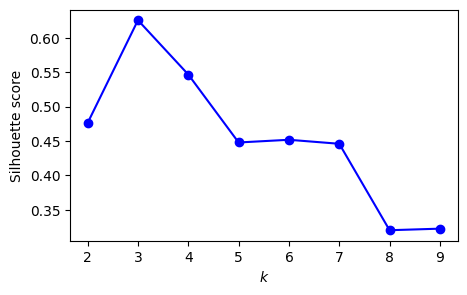

In [35]:
plt.figure(figsize=(5, 3))

plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.show()

#### Plot Sihouette coefficients

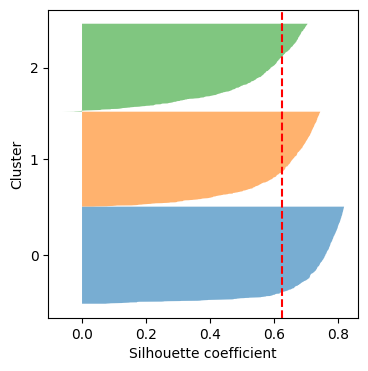

In [44]:
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(4, 4))

k = 3
y_pred = kmeans_k[k - 1].labels_
sihouette_coefficients = silhouette_samples(x, y_pred)

pos = 0
ticks = []

for i in range(k):
  coeffs = sihouette_coefficients[y_pred == i]
  coeffs.sort()
  
  plt.fill_betweenx(
    np.arange(pos, pos + len(coeffs)),
    0,
    coeffs,
    alpha=0.6
  )

  ticks.append(pos + len(coeffs) // 2)
  pos += len(coeffs)

plt.axvline(x=silhouette_scores[k - 2], color='r', linestyle='--')

plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster')
plt.show()